In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

We introduce an important concept when working with NumPy: the axis. This indicates the particular dimension along which a function should operate (provided the function does something taking multiple values and converts to a single value).

Let's look at a concrete example with sum:

In [2]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

This calculates the total of all values in the array.

In [3]:
np.sum(a)

66

Some of NumPy's functions can be accessed as ndarray methods!

In [4]:
a.sum()

66

Now, with a reminder about how our array is shaped


In [5]:
a.shape

(3, 4)

We can specify axis to get just the sum across each
of our rows.

In [7]:
np.sum(a, axis=0)

array([12, 15, 18, 21])

or do the same and take the sum across columns:

In [8]:
np.sum(a, axis=1)

array([ 6, 22, 38])

After putting together some data and introducing some more advanced calculations, let's demonstrate a multi-layered example: calculating temperature advection. If you're not familiar with this (don't worry!).

In [9]:
temp = np.random.randn(100,50)
u = np.random.randn(100, 50)
v = np.random.randn(100, 50)

We can calculate the np.gradient of our new T(100x50) field as two separate component gradients.

In [10]:
gradient_x, gradient_y = np.gradient(temp)

In order to calculate we will use np.dstack to turn our two separate component gradient fileds into one multidimensional field containing x and y gradients at each of our 100x50 points 

In [12]:
grad_vectors = np.dstack([gradient_x, gradient_y])
print(grad_vectors)
print(grad_vectors.shape)

[[[ 1.21520066  1.50152722]
  [-1.03390298  1.49868306]
  [-1.89026821 -0.12033022]
  ...
  [-1.89165844  0.53862551]
  [-0.52107845  0.34735251]
  [-1.39398477 -0.29921679]]

 [[ 0.30304238 -0.74757642]
  [-0.03784033 -0.05405137]
  [-1.00024187 -0.54844377]
  ...
  [-0.74011753  0.6809359 ]
  [-1.00403739  0.59618935]
  [ 0.54276879 -1.17212311]]

 [[-0.35375589  0.8197618 ]
  [ 0.77481337  0.19539881]
  [ 0.53437576  0.29027689]
  ...
  [-0.00699489 -0.88128311]
  [-0.54271793  1.63023883]
  [-0.05093407  2.79439557]]

 ...

 [[ 0.72326626 -0.92025822]
  [ 0.3569283  -0.35462256]
  [ 0.02045078  0.05005195]
  ...
  [-0.68583973  0.50125239]
  [ 0.16138458 -0.33889984]
  [-0.85276466 -1.88679487]]

 [[-0.10254398  0.36715959]
  [ 1.10071389 -1.26721506]
  [ 0.04313362 -1.22721281]
  ...
  [ 0.19409313  0.9305779 ]
  [ 0.27497837 -1.37301091]
  [ 0.40665221 -2.76839273]]

 [[-1.52164009  1.4862575 ]
  [-0.40254218 -0.20894497]
  [ 0.59490009 -1.09344135]
  ...
  [-0.59877371  0.348963

and then do the same for our separate u and v wind components 

In [13]:
wind_vectors = np.dstack([u, v])
print(wind_vectors.shape)

(100, 50, 2)


In [14]:
advection = (wind_vectors * -grad_vectors).sum(axis=-1)
print(advection.shape)

(100, 50)


In [15]:
#create some synthetic data representing temperature and wind speed data
np.random.seed(19990503) # make sure we all have the same data 
temp = 20 * np.cos(np.linspace(0, 2 * np.pi, 100)) + 50 + 2 * np.random.randn(100)
speed = np.abs(
    10 * np.sin(np.linspace(0, 2 * np.pi, 100)) + 10 + 5 * np.random.randn(100)
)

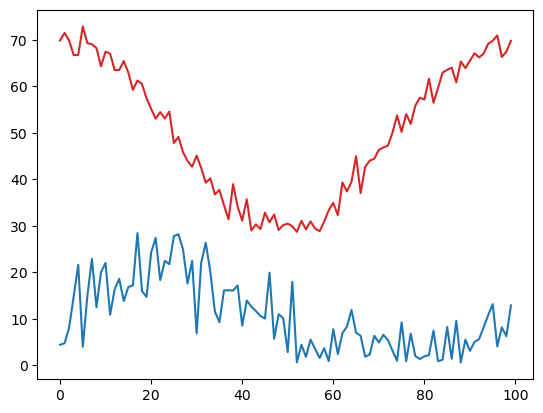

In [16]:
plt.plot(temp, 'tab:red')
plt.plot(speed, 'tab:blue')

By doing a comparison between a NumPy array and a value, we get an array of values representing the results of the comparison between each element and the value

In [26]:
temp > 45


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [18]:
temp[temp > 45]

array([69.89825854, 71.52313905, 69.90028363, 66.73828667, 66.77980233,
       72.91468564, 69.34603239, 69.09533591, 68.27350814, 64.33916721,
       67.49497791, 67.05282372, 63.51829518, 63.54034678, 65.46576463,
       62.99683836, 59.27662304, 61.29361272, 60.51641586, 57.46048995,
       55.19793004, 53.07572989, 54.47998158, 53.09552107, 54.59037269,
       47.84272747, 49.1435589 , 45.87151534, 45.11976794, 45.009292  ,
       46.36021141, 46.87557425, 47.25668992, 50.09599544, 53.77789358,
       50.24073197, 54.07629059, 51.95065202, 55.84827794, 57.56967086,
       57.19572063, 61.67658285, 56.51474577, 59.72166924, 62.99403256,
       63.57569453, 64.05984232, 60.88258643, 65.37759899, 63.94115754,
       65.53070256, 67.15175649, 66.26468701, 67.03811793, 69.17773618,
       69.83571708, 70.99586742, 66.34971928, 67.49905207, 69.83593609])

In [21]:
temp[temp > 45].shape


(60,)

In [27]:
temp_45 = temp[temp > 45]

In [28]:
temp_45[temp < 45]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 100

We find that our original (100,) shape array is too large to subset our new (60,) array. If their sizes do match, the boolean array can come from a totally different array!

In [29]:
speed > 10

array([False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True])

In [30]:
temp[speed > 10]

array([66.73828667, 66.77980233, 69.34603239, 69.09533591, 68.27350814,
       64.33916721, 67.49497791, 67.05282372, 63.51829518, 63.54034678,
       65.46576463, 62.99683836, 59.27662304, 61.29361272, 60.51641586,
       57.46048995, 55.19793004, 53.07572989, 54.47998158, 53.09552107,
       54.59037269, 47.84272747, 49.1435589 , 45.87151534, 43.95971516,
       42.72814762, 42.45316175, 39.2797517 , 40.23351938, 36.77179678,
       34.43329229, 31.42277612, 38.97505745, 34.10549575, 35.70826448,
       29.01276068, 30.31180935, 29.31602671, 32.84580454, 30.76695309,
       29.11344716, 30.16652571, 29.91513049, 39.51784389, 69.17773618,
       69.83571708, 69.83593609])

In [31]:
temp[speed > 10].shape

(47,)

In [32]:
# make a copy of our original array so we don't modify the original data
temp2 = temp.copy()
speed2 = speed.copy()

#Replace all places where speed is < 10 with NaN (not a number)
temp2[speed < 10] = np.nan
speed2[speed < 10] = np.nan

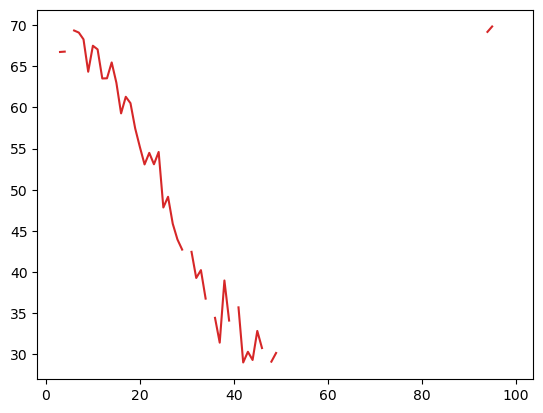

In [33]:
plt.plot(temp2, 'tab:red');

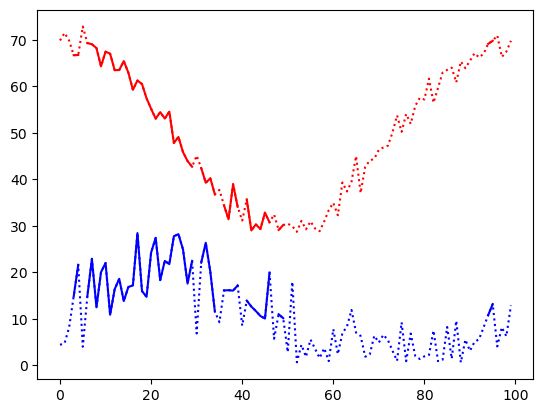

In [34]:
#and to put this in context
plt.plot(temp, 'r:')
plt.plot(temp2, 'r')
plt.plot(speed, 'b:')
plt.plot(speed2, 'b');

If we use parentheses to preserve the order of operations, we can combine these conditions with other bitwise operators like the & for bitwise_and,

In [36]:
multi_mask = (temp < 45) & (speed > 10)
multi_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [37]:
temp[multi_mask]

array([43.95971516, 42.72814762, 42.45316175, 39.2797517 , 40.23351938,
       36.77179678, 34.43329229, 31.42277612, 38.97505745, 34.10549575,
       35.70826448, 29.01276068, 30.31180935, 29.31602671, 32.84580454,
       30.76695309, 29.11344716, 30.16652571, 29.91513049, 39.51784389])

Heat index is only defined for temperatures >= 80F and relative humidity values >= 40%. Using the data generated below, we can use boolean indexing to extract the data where heat index has a valid value.

In [41]:
#Here's the "data" (fake dataset we generated using np.random)
np.random.seed(19990503)
temp = 20 * np.cos(np.linspace(0, 2 * np.pi, 100)) + 80 +2 * np.random.randn(100)
relative_humidity = np.abs(
    20 * np.cos(np.linspace(0, 4 * np.pi, 100)) + 50 + 5 * np.random.randn(100)
)

print(relative_humidity)
#crete a mask for the two conditions described above 
good_heat_index = (temp >= 80) & (relative_humidity >= 40)

#Use this mask to grab the temperature and relative values that together 
#will give good heat index values
print(temp[good_heat_index])
print(relative_humidity[good_heat_index])

[64.41045129 63.94107515 66.2175621  71.48588167 76.57561274 56.97061424
 65.6174912  71.21926314 58.15670461 62.93320686 62.03087447 47.92098601
 50.42226541 49.67509403 41.95956847 42.14908    39.81835347 48.55489779
 33.78038018 30.47764103 38.23335058 39.92390669 29.67728279 33.01165767
 31.87556551 37.78283124 38.50032926 35.85896142 29.47521117 35.66832585
 21.67733168 38.83641439 45.29454296 41.45231233 35.50992064 35.97650684
 45.70336274 48.70880311 51.61888004 55.71014844 49.99526349 58.22074331
 59.65439058 61.23007811 62.50272656 64.06486141 75.7876089  63.13004094
 69.66969486 69.77177554 63.11171784 78.54129716 59.93579341 64.66317527
 61.46583548 64.27090944 61.12801306 54.61804699 50.90918957 51.92442128
 58.65704847 46.48468608 53.72962669 53.02952364 54.53396602 33.57472879
 32.33761646 38.69309578 37.51989429 40.07917883 27.58292488 38.0317938
 36.1162744  27.0816335  30.96242929 39.31009319 29.55533081 37.8800335
 29.95739885 31.72573287 32.51128121 33.79755872 45.2

Another bitwise operator we can find helpful is Python's ~ complement operator, which can give us the inverse of our specefic mask to let us assign np.nan to every value not satisfied in good_heat_index.

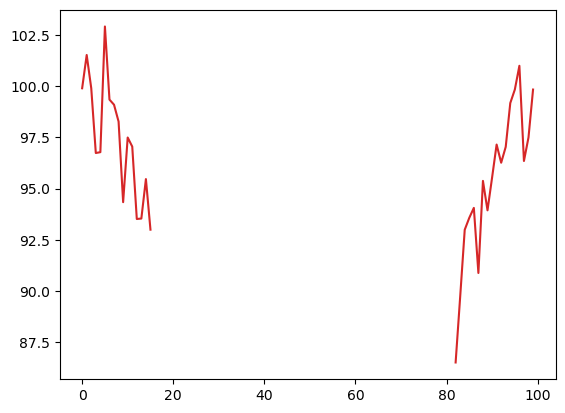

In [44]:
plot_temp = temp.copy()
plot_temp[~good_heat_index]=np.nan
plt.plot(plot_temp, 'tab:red');

## Indexing using arrays of indices 

You can also use a list or array of indices to extract particular values - this is a natural extension of the regular indexing. For instance, just as we can select the first element:

In [45]:
temp[0]

99.89825854468695

We can also extract the first, fifth, and tenth elements as a list:

In [46]:
temp[[0, 4, 9]]

array([99.89825854, 96.77980233, 94.33916721])

One of the ways this comes into plsy is trying to sort NumPy arrays using argsort. This function returns the indices of the array that give the items in sorted order. So for our temp,

In [47]:
inds = np.argsort(temp)
inds

array([52, 57, 42, 48, 54, 44, 56, 51, 49, 43, 50, 46, 58, 55, 53, 40, 37,
       61, 47, 45, 59, 39, 36, 60, 41, 34, 66, 63, 35, 38, 32, 62, 64, 33,
       31, 67, 29, 28, 68, 69, 65, 30, 27, 70, 71, 72, 25, 26, 73, 75, 77,
       21, 23, 74, 76, 22, 24, 20, 78, 82, 80, 19, 79, 16, 83, 18, 87, 17,
       81, 84, 15, 12, 13, 85, 89, 86,  9, 88, 14, 90, 92, 97,  3,  4, 93,
       11, 91, 10, 98,  8,  7, 94,  6, 95, 99,  0,  2, 96,  1,  5],
      dtype=int64)

i.e., our lowest value is at index 52, next 57, and so on. We can use this array of indices as an index for temp,

In [48]:
temp[inds]

array([ 58.71828204,  58.85269149,  59.01276068,  59.11344716,
        59.25186164,  59.31602671,  59.42796381,  59.91513049,
        60.16652571,  60.31180935,  60.48608715,  60.76695309,
        60.93380275,  60.95814392,  61.07199963,  61.1341411 ,
        61.42277612,  62.27369636,  62.44927684,  62.84580454,
        63.37573713,  64.10549575,  64.43329229,  64.95696914,
        65.70826448,  66.77179678,  67.06954335,  67.39853293,
        67.7453367 ,  68.97505745,  69.2797517 ,  69.34620461,
        69.51784389,  70.23351938,  72.45316175,  72.69583703,
        72.72814762,  73.95971516,  74.03576453,  74.45775806,
        75.009292  ,  75.11976794,  75.87151534,  76.36021141,
        76.87557425,  77.25668992,  77.84272747,  79.1435589 ,
        80.09599544,  80.24073197,  81.95065202,  83.07572989,
        83.09552107,  83.77789358,  84.07629059,  84.47998158,
        84.59037269,  85.19793004,  85.84827794,  86.51474577,
        87.19572063,  87.46048995,  87.56967086,  89.27

to get a sorted array back!

With some clever slicing, we can pull out the last 10, or 10 highest, values of temp,

In [53]:
ten_highest = inds[-10:]
ten_lowest = inds[:10]
print(temp[ten_highest])
print(temp[ten_lowest])

[ 99.09533591  99.17773618  99.34603239  99.83571708  99.83593609
  99.89825854  99.90028363 100.99586742 101.52313905 102.91468564]
[58.71828204 58.85269149 59.01276068 59.11344716 59.25186164 59.31602671
 59.42796381 59.91513049 60.16652571 60.31180935]


There are other NumPy arg functions that return indices for operating, check out the NumPy docs on sorting your arrays!

## Summary 

In this notebook we introduced the power of understanding the dimensions of our data by specifying math along axis, used True and False values to subset our data according to conditions, and used lists of positions within our array to sort our data.

## What's Next

Taking some time to practice thhis is valuable to be able to quickly manipulate arrays of information in useful or scientific ways.